# Enron dataset analysis <a class="tocSkip">

Open this preferrably in [nbviewer](https://nbviewer.jupyter.org/github/xR86/ml-stuff/blob/master/kaggle/enron-email/Initial.ipynb), so that svgs can also be rendered.

https://www.kaggle.com/wcukierski/enron-email-dataset/home

---

# Imports

## Import dependencies

In [1]:
# built-in libs
import email

# processing libs
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# visualization libs
import matplotlib.pyplot as plt
%matplotlib inline


# display libs
from tqdm import tqdm, tqdm_notebook # !
tqdm.pandas()

## Read data

In [2]:
emails_full_df = pd.read_csv('emails.csv', chunksize=10000)
emails_df = next(emails_full_df)

In [3]:
print(emails_df.shape)
emails_df.head()

(10000, 2)


file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...

In [4]:
emails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
file       10000 non-null object
message    10000 non-null object
dtypes: object(2)
memory usage: 156.3+ KB


---

# Cleaning data

In [5]:
msg = email.message_from_string(emails_df.message[0])
print('From: %s' % msg['from'])
print('To:   %s' % msg['to'])
print()
print(msg.get_payload(decode=True))
print()
print(str(msg).strip())

From: phillip.allen@enron.com
To:   tim.belden@enron.com

b'Here is our forecast\n\n '

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast


In [6]:
%time
messages_obj_lst = []
messages_str_lst = []

message_metadata = {}

for i in tqdm(range(emails_df.shape[0])):
    msg = email.message_from_string(emails_df.message[i])
    
    for msg_property in msg:
        if msg_property in message_metadata:
            message_metadata[msg_property][i] = msg[msg_property]
        else:
            message_metadata[msg_property] = ['N/A'] * emails_df.shape[0]
    
    payload = msg.get_payload() # decode=True
    
    messages_obj_lst.append(msg)
    messages_str_lst.append(payload) #.encode('utf-8').decode('unicode_escape')
    #except KeyboardInterrupt:
    #    break

print('messages_obj_lst size: %i' % len(messages_obj_lst))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs

  0%|          | 0/10000 [00:00<?, ?it/s]


Wall time: 4.77 µs


100%|██████████| 10000/10000 [00:02<00:00, 3707.23it/s]

messages_obj_lst size: 10000


In [7]:
# update dataframe object
# emails_df.rename(columns = {'message':'message_obj'}, inplace = True)
emails_df = emails_df.assign(message_obj = pd.Series(messages_obj_lst).values)
emails_df = emails_df.assign(payload     = pd.Series(messages_str_lst).values)

# print(emails_df.payload.str.contains(r'\\'))
emails_df['payload'] = emails_df.payload.str.replace(r'\n', '')

In [8]:
emails_df.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             message  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...   
1  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  Message-ID: <24216240.1075855687451.JavaMail.e...   
3  Message-ID: <13505866.1075863688222.JavaMail.e...   
4  Message-ID: <30922949.1075863688243.JavaMail.e...   

                                         message_obj  \
0  [Message-ID, Date, From, To, Subject, Mime-Ver...   
1  [Message-ID, Date, From, To, Subject, Mime-Ver...   
2  [Message-ID, Date, From, To, Subject, Mime-Ver...   
3  [Message-ID, Date, From, To, Subject, Mime-Ver...   
4  [Message-ID, Date, From, To, Subject, Mime-Ver...   

                                             payload  
0                              Here is our forecast   
1  Traveling to have a business meeting takes the...  
2                     test successful.  way to go!!!  
3  Randy, Can you send me a schedule of the salar...  
4                Let's shoot for Tuesday at 11:45.

---

# Metadata analysis

In [9]:
emails_meta_df = emails_df.drop('message', axis=1)
emails_meta_df.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                         message_obj  \
0  [Message-ID, Date, From, To, Subject, Mime-Ver...   
1  [Message-ID, Date, From, To, Subject, Mime-Ver...   
2  [Message-ID, Date, From, To, Subject, Mime-Ver...   
3  [Message-ID, Date, From, To, Subject, Mime-Ver...   
4  [Message-ID, Date, From, To, Subject, Mime-Ver...   

                                             payload  
0                              Here is our forecast   
1  Traveling to have a business meeting takes the...  
2                     test successful.  way to go!!!  
3  Randy, Can you send me a schedule of the salar...  
4                Let's shoot for Tuesday at 11:45.

In [10]:
print(emails_meta_df.message_obj[0]['From'])
#print(emails_meta_df['message_obj']['From'])

emails_meta_df = emails_meta_df.assign(Message_ID = pd.Series(message_metadata['Message-ID']).values)
emails_meta_df = emails_meta_df.assign(Date       = pd.Series(message_metadata['Date']).values)
emails_meta_df = emails_meta_df.assign(From       = pd.Series(message_metadata['From']).values)
emails_meta_df = emails_meta_df.assign(To         = pd.Series(message_metadata['To']).values)
emails_meta_df = emails_meta_df.assign(Subject    = pd.Series(message_metadata['Subject']).values)
emails_meta_df = emails_meta_df.assign(Mime_Version = pd.Series(message_metadata['Mime-Version']).values)
emails_meta_df = emails_meta_df.assign(Content_Type = pd.Series(message_metadata['Content-Type']).values)
emails_meta_df = emails_meta_df.assign(Content_Transfer_Encoding = pd.Series(message_metadata['Content-Transfer-Encoding']).values)
emails_meta_df = emails_meta_df.assign(X_From = pd.Series(message_metadata['X-From']).values)
emails_meta_df = emails_meta_df.assign(X_To = pd.Series(message_metadata['X-To']).values)
emails_meta_df = emails_meta_df.assign(X_cc = pd.Series(message_metadata['X-cc']).values)
emails_meta_df = emails_meta_df.assign(X_bcc = pd.Series(message_metadata['X-bcc']).values)

emails_meta_df = emails_meta_df.assign(X_Folder = pd.Series(message_metadata['X-Folder']).values)
emails_meta_df = emails_meta_df.assign(X_Origin = pd.Series(message_metadata['X-Origin']).values)
emails_meta_df = emails_meta_df.assign(X_FileName = pd.Series(message_metadata['X-FileName']).values)

phillip.allen@enron.com


In [11]:
emails_meta_df.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                         message_obj  \
0  [Message-ID, Date, From, To, Subject, Mime-Ver...   
1  [Message-ID, Date, From, To, Subject, Mime-Ver...   
2  [Message-ID, Date, From, To, Subject, Mime-Ver...   
3  [Message-ID, Date, From, To, Subject, Mime-Ver...   
4  [Message-ID, Date, From, To, Subject, Mime-Ver...   

                                             payload  \
0                              Here is our forecast    
1  Traveling to have a business meeting takes the...   
2                     test successful.  way to go!!!   
3  Randy, Can you send me a schedule of the salar...   
4                Let's shoot for Tuesday at 11:45.     

                                      Message_ID  \
0                                            N/A   
1  <15464986.1075855378456.JavaMail.evans@thyme>   
2  <24216240.1075855687451.JavaMail.evans@thyme>   
3  <13505866.1075863688222.JavaMail.evans@thyme>   
4  <30922949.1075863688243.JavaMail.evans@thyme>   

                                    Date                     From  \
0                                    N/A                      N/A   
1   Fri, 4 May 2001 13:51:00 -0700 (PDT)  phillip.allen@enron.com   
2  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)  phillip.allen@enron.com   
3  Mon, 23 Oct 2000 06:13:00 -0700 (PDT)  phillip.allen@enron.com   
4  Thu, 31 Aug 2000 05:07:00 -0700 (PDT)  phillip.allen@enron.com   

                        To    Subject Mime_Version  \
0                      N/A        N/A          N/A   
1  john.lavorato@enron.com        Re:          1.0   
2   leah.arsdall@enron.com   Re: test          1.0   
3    randall.gay@enron.com                     1.0   
4     greg.piper@enron.com  Re: Hello          1.0   

                   Content_Type Content_Transfer_Encoding           X_From  \
0                           N/A                       N/A              N/A   
1  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
2  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
3  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
4  text/plain; charset=us-ascii                      7bit  Phillip K Allen   

                                                X_To X_cc X_bcc  \
0                                                N/A  N/A   N/A   
1  John J Lavorato <John J Lavorato/ENRON@enronXg...              
2                                   Leah Van Arsdall              
3                                      Randall L Gay              
4                                         Greg Piper              

                                            X_Folder X_Origin  \
0                                                N/A      N/A   
1  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Allen-P   
2    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   
3    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   
4    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   

                    X_FileName  
0                          N/A  
1  pallen (Non-Privileged).pst  
2                   pallen.nsf  
3                   pallen.nsf  
4                   pallen.nsf

In [12]:
# Analyzing ranges for metadata
print(len(emails_meta_df['From'].unique()))
print(len(emails_meta_df['To'].unique()))

print(emails_meta_df['Mime_Version'].unique()) #can be safely ignored
print(emails_meta_df['Content_Type'].unique())
print(emails_meta_df['Content_Transfer_Encoding'].unique())
print(len(emails_meta_df['X_cc'].unique()))
print(len(emails_meta_df['X_bcc'].unique()))
print(len(emails_meta_df['X_Folder'].unique()))
print(emails_meta_df['X_Origin'].unique())
print(emails_meta_df['X_FileName'].unique())

# print(emails_meta_df['From'].value_counts('phillip.allen@enron.com'))

755
1335
['N/A' '1.0']
['N/A' 'text/plain; charset=us-ascii' 'text/plain; charset=ANSI_X3.4-1968']
['N/A' '7bit' 'quoted-printable']
422
3
126
['N/A' 'Allen-P' 'Arnold-J' 'ARNOLD-J' 'ARORA-H' 'Arora-H' 'Badeer-R'
 'BAILEY-S' 'Bailey-S' 'BASS-E' 'Bass-E']
['N/A' 'pallen (Non-Privileged).pst' 'pallen.nsf'
 'PALLEN (Non-Privileged).pst' 'Jarnold.nsf' 'jarnold.nsf'
 'JARNOLD (Non-Privileged).pst' 'jarnold (Non-Privileged).pst'
 'harora.nsf' 'harora (Non-Privileged).pst' 'HARORA (Non-Privileged).pst'
 'rbadeer.nsf' 'rbadeer (Non-Privileged).pst' 'sbailey2.nsf'
 'sbaile2 (Non-Privileged).pst' 'SBAILE2 (Non-Privileged).pst'
 'eric bass 6-25-02.PST' 'ebass.nsf']


In [13]:
emails_meta_df.drop('message_obj', axis=1).to_csv('emails_cleaned.csv', index=False)

---

# Payload analysis

## Payload word cloud (on decoded payload - no preprocessing)

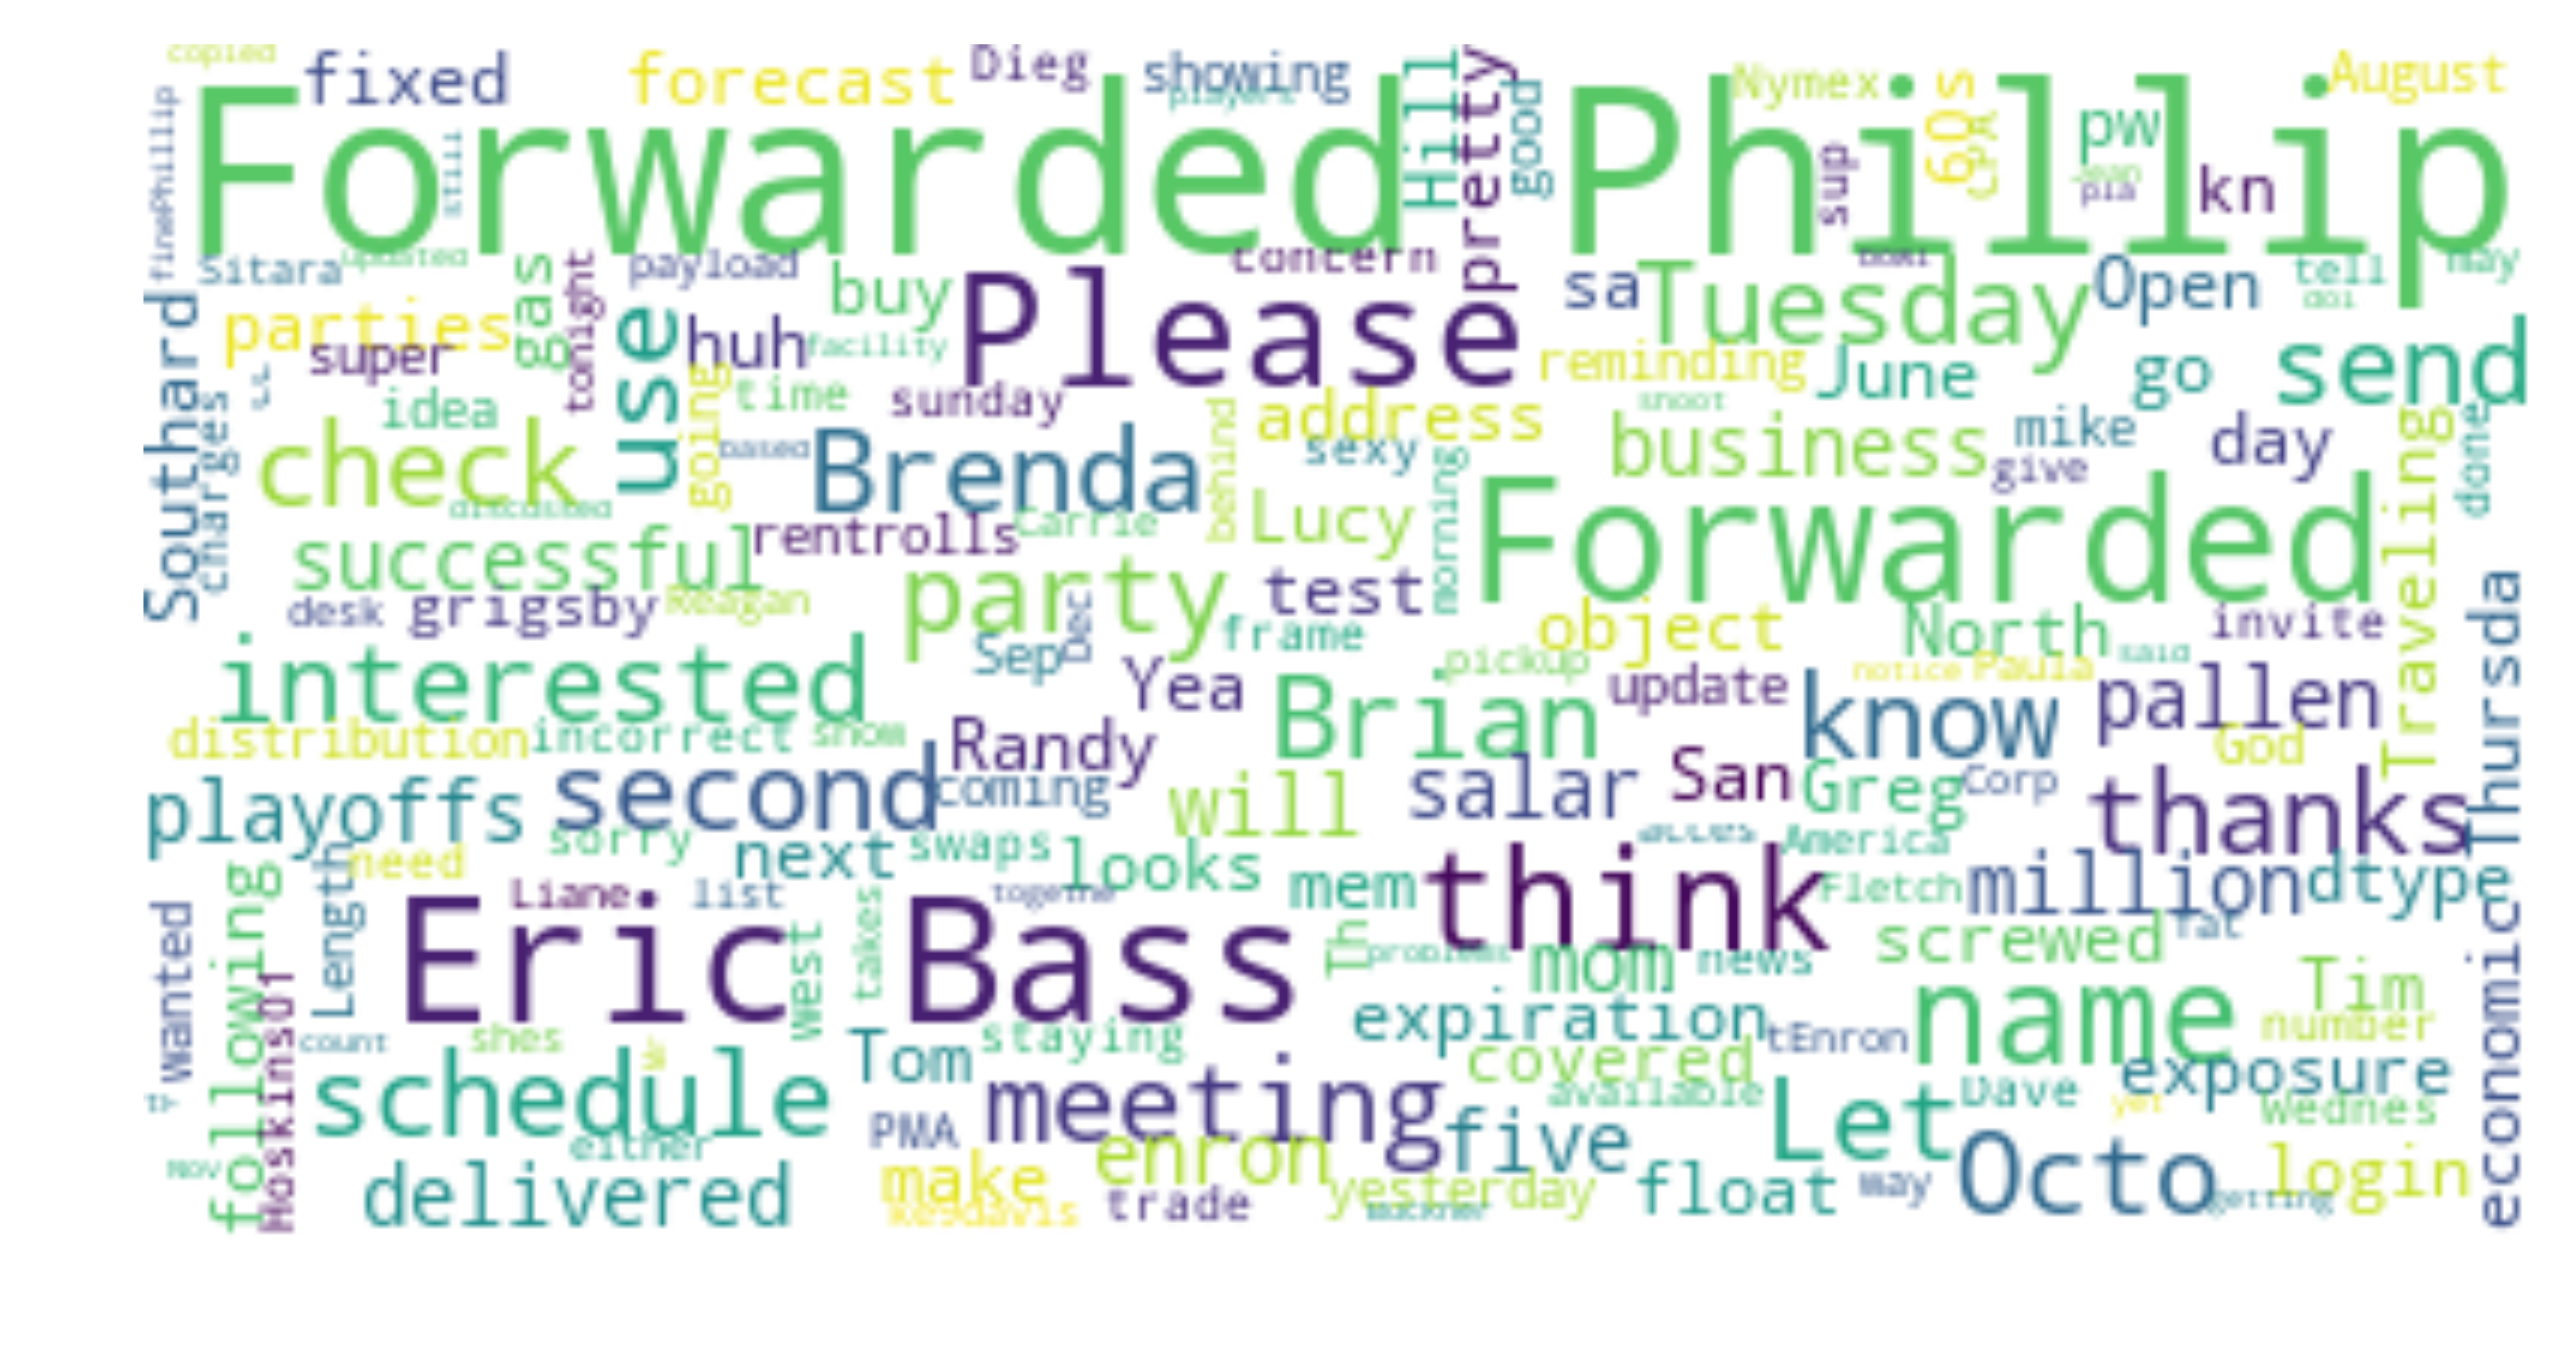

In [15]:
wordcloud = WordCloud(
    # width=1200,
    # height=800,
    margin=0,
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40, 
    random_state=42
 ).generate(str(emails_df['payload']))

plt.rcParams['figure.dpi'] = 600 #72
plt.rcParams['figure.figsize'] = (10,8)

print(wordcloud)
plt.imshow(wordcloud, interpolation='bilinear') #, interpolation='bilinear'
plt.axis('off')
plt.show()

## NLP tools

In [29]:
import nltk
from nltk.corpus import stopwords

emails_nlp_df = emails_df.drop(['message', 'message_obj'], axis=1)
emails_nlp_df.head()

file                                            payload
0     allen-p/_sent_mail/1.                              Here is our forecast 
1    allen-p/_sent_mail/10.  Traveling to have a business meeting takes the...
2   allen-p/_sent_mail/100.                     test successful.  way to go!!!
3  allen-p/_sent_mail/1000.  Randy, Can you send me a schedule of the salar...
4  allen-p/_sent_mail/1001.                Let's shoot for Tuesday at 11:45.

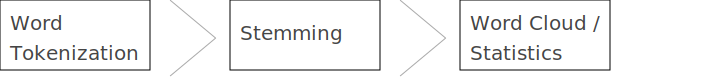

In [30]:
%%svg
<svg width="720" height="80">
    <g>
        <g>
            <rect x="0" y="0" width="150" height="70" fill="#FFF" stroke="#000"></rect>
            <text x="10" y="30" font-family="Verdana" font-size="20" fill="#444">Word</text>
            <text x="10" y="60" font-family="Verdana" font-size="20" fill="#444">Tokenization</text>
        </g>

        <g transform="translate(170,0)">
         <polyline fill="none" stroke="#AAA" stroke-width="1" stroke-linecap="round" stroke-linejoin="round" points="
            0.375,0.375 45.63,38.087 0.375,75.8 "/>
        </g>

        <g transform="translate(230,0)">
            <rect x="0" y="0" width="150" height="70" fill="#FFF" stroke="#000"></rect>
            <text x="10" y="40" font-family="Verdana" font-size="20" fill="#444">Stemming</text>
        </g>

        <g transform="translate(400,0)">
         <polyline fill="none" stroke="#AAA" stroke-width="1" stroke-linecap="round" stroke-linejoin="round" points="
            0.375,0.375 45.63,38.087 0.375,75.8 "/>
        </g>

         <g transform="translate(460,0)">
            <rect x="0" y="0" width="150" height="70" fill="#FFF" stroke="#000"></rect>
            <text x="10" y="30" font-family="Verdana" font-size="20" fill="#444">Word Cloud /</text>
            <text x="10" y="60" font-family="Verdana" font-size="20" fill="#444">Statistics</text>
        </g>
    </g>
#     <g transform="translate(10, 200)">
#         <rect x="0" y="0" width="150" height="70" fill="#FFF" stroke="#000"></rect>
#         <text x="10" y="40" font-family="Verdana" font-size="20" fill="#444">sada</text>
#     </g>
</svg>

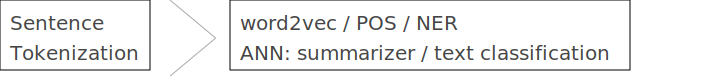

In [31]:
%%svg
<svg width="720" height="80">
    <g>
        <g>
            <rect x="0" y="0" width="150" height="70" fill="#FFF" stroke="#000"></rect>
            <text x="10" y="30" font-family="Verdana" font-size="20" fill="#444">Sentence</text>
            <text x="10" y="60" font-family="Verdana" font-size="20" fill="#444">Tokenization</text>
        </g>

        <g transform="translate(170,0)">
         <polyline fill="none" stroke="#AAA" stroke-width="1" stroke-linecap="round" stroke-linejoin="round" points="
            0.375,0.375 45.63,38.087 0.375,75.8 "/>
        </g>

        <g transform="translate(230,0)">
            <rect x="0" y="0" width="400" height="70" fill="#FFF" stroke="#000"></rect>
            <text x="10" y="30" font-family="Verdana" font-size="20" fill="#444">word2vec / POS / NER</text>
            <text x="10" y="60" font-family="Verdana" font-size="20" fill="#444">ANN: summarizer / text classification</text>
        </g>
    </g>
</svg>

Relevant for text clasification: https://machinelearnings.co/text-classification-using-neural-networks-f5cd7b8765c6

### Tokenization

In [32]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [33]:
# first, nltk.download() -> tokenizers/punkt/english.pickle
nltk.download('punkt')
payload_tokenized_lst = []
payload_lines_tokenized_lst = []

for i in tqdm(range(emails_df.shape[0])):
    payload_lines_tokenized_str = sent_tokenize(emails_nlp_df.payload[i])
    payload_lines_tokenized_lst.append(payload_lines_tokenized_str)
    payload_tokenized_str = word_tokenize(emails_nlp_df.payload[i])
    payload_tokenized_lst.append(payload_tokenized_str)

print('payload_tokenized_lst size: %i' % len(payload_tokenized_lst))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
100%|██████████| 10000/10000 [00:26<00:00, 374.84it/s]

payload_tokenized_lst size: 10000


In [34]:
emails_nlp_df = emails_nlp_df.assign(payload_lines_tokenized = pd.Series(payload_lines_tokenized_lst).values)
emails_nlp_df = emails_nlp_df.assign(payload_tokenized = pd.Series(payload_tokenized_lst).values)
emails_nlp_df.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             payload  \
0                              Here is our forecast    
1  Traveling to have a business meeting takes the...   
2                     test successful.  way to go!!!   
3  Randy, Can you send me a schedule of the salar...   
4                Let's shoot for Tuesday at 11:45.     

                             payload_lines_tokenized  \
0                             [Here is our forecast]   
1  [Traveling to have a business meeting takes th...   
2                 [test successful., way to go!!, !]   
3  [Randy, Can you send me a schedule of the sala...   
4                [Let's shoot for Tuesday at 11:45.]   

                                   payload_tokenized  
0                          [Here, is, our, forecast]  
1  [Traveling, to, have, a, business, meeting, ta...  
2        [test, successful, ., way, to, go, !, !, !]  
3  [Randy, ,, Can, you, send, me, a, schedule, of...  
4       [Let, 's, shoot, for, Tuesday, at, 11:45, .]

### Stemming

In [35]:
from nltk.stem import *
from nltk.stem.porter import *

In [36]:
# Porter stemming of the naive tokenization
stemmer = PorterStemmer()
payload_stemmed_lst = []

for i in tqdm(range(emails_df.shape[0])):
    # emails_nlp_df.payload[i].split(' ') #naive tokenization
    payload_stemmed_str = [stemmer.stem(word) for word in emails_nlp_df.payload_tokenized[i]]
    payload_stemmed_lst.append(payload_stemmed_str)

print('payload_stemmed_lst size: %i' % len(payload_stemmed_lst))

100%|██████████| 10000/10000 [00:51<00:00, 195.14it/s]

payload_stemmed_lst size: 10000


In [37]:
emails_nlp_df = emails_nlp_df.assign(payload_stemmed = pd.Series(payload_stemmed_lst).values)
emails_nlp_df.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             payload  \
0                              Here is our forecast    
1  Traveling to have a business meeting takes the...   
2                     test successful.  way to go!!!   
3  Randy, Can you send me a schedule of the salar...   
4                Let's shoot for Tuesday at 11:45.     

                             payload_lines_tokenized  \
0                             [Here is our forecast]   
1  [Traveling to have a business meeting takes th...   
2                 [test successful., way to go!!, !]   
3  [Randy, Can you send me a schedule of the sala...   
4                [Let's shoot for Tuesday at 11:45.]   

                                   payload_tokenized  \
0                          [Here, is, our, forecast]   
1  [Traveling, to, have, a, business, meeting, ta...   
2        [test, successful, ., way, to, go, !, !, !]   
3  [Randy, ,, Can, you, send, me, a, schedule, of...   
4       [Let, 's, shoot, for, Tuesday, at, 11:45, .]   

                                     payload_stemmed  
0                          [here, is, our, forecast]  
1  [travel, to, have, a, busi, meet, take, the, f...  
2           [test, success, ., way, to, go, !, !, !]  
3  [randi, ,, can, you, send, me, a, schedul, of,...  
4       [let, 's, shoot, for, tuesday, at, 11:45, .]

### Sentiment analysis

In [38]:
# sentim_analyzer = SentimentAnalyzer()
# all_words_neg = sentim_analyzer.all_words()

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [39]:
# second, nltk.download() -> sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

payload_sentiment_intensity_lst = []
for i in tqdm(range(emails_df.shape[0])):
    payload_sentiment_intensity_str = [sid.polarity_scores(line) for line in payload_tokenized_lst[i]]
    payload_sentiment_intensity_lst.append(payload_sentiment_intensity_str)

print('payload_sentiment_intensity_lst size: %i' % len(payload_sentiment_intensity_lst))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
100%|██████████| 10000/10000 [01:12<00:00, 138.82it/s]

payload_sentiment_intensity_lst size: 10000


In [40]:
emails_nlp_df = emails_nlp_df.assign(payload_sentiment_intensity_obj = pd.Series(payload_sentiment_intensity_lst).values)
emails_nlp_df.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             payload  \
0                              Here is our forecast    
1  Traveling to have a business meeting takes the...   
2                     test successful.  way to go!!!   
3  Randy, Can you send me a schedule of the salar...   
4                Let's shoot for Tuesday at 11:45.     

                             payload_lines_tokenized  \
0                             [Here is our forecast]   
1  [Traveling to have a business meeting takes th...   
2                 [test successful., way to go!!, !]   
3  [Randy, Can you send me a schedule of the sala...   
4                [Let's shoot for Tuesday at 11:45.]   

                                   payload_tokenized  \
0                          [Here, is, our, forecast]   
1  [Traveling, to, have, a, business, meeting, ta...   
2        [test, successful, ., way, to, go, !, !, !]   
3  [Randy, ,, Can, you, send, me, a, schedule, of...   
4       [Let, 's, shoot, for, Tuesday, at, 11:45, .]   

                                     payload_stemmed  \
0                          [here, is, our, forecast]   
1  [travel, to, have, a, busi, meet, take, the, f...   
2           [test, success, ., way, to, go, !, !, !]   
3  [randi, ,, can, you, send, me, a, schedul, of,...   
4       [let, 's, shoot, for, tuesday, at, 11:45, .]   

                     payload_sentiment_intensity_obj  
0  [{'pos': 0.0, 'neu': 1.0, 'compound': 0.0, 'ne...  
1  [{'pos': 0.0, 'neu': 1.0, 'compound': 0.0, 'ne...  
2  [{'pos': 0.0, 'neu': 1.0, 'compound': 0.0, 'ne...  
3  [{'pos': 0.0, 'neu': 1.0, 'compound': 0.0, 'ne...  
4  [{'pos': 0.0, 'neu': 1.0, 'compound': 0.0, 'ne...

In [41]:
emails_nlp_df.payload_sentiment_intensity_obj[0]

[{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]

---

# ---

In [2]:
emails = pd.read_csv('emails_payload.csv')
emails['payload_len'] = emails.payload.apply(len)
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   file         1000 non-null   object
 1   message_obj  1000 non-null   object
 2   payload      1000 non-null   object
 3   payload_len  1000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [3]:
emails.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                         message_obj  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...   
1  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  Message-ID: <24216240.1075855687451.JavaMail.e...   
3  Message-ID: <13505866.1075863688222.JavaMail.e...   
4  Message-ID: <30922949.1075863688243.JavaMail.e...   

                                             payload  payload_len  
0                              Here is our forecast            21  
1  Traveling to have a business meeting takes the...          781  
2                     test successful.  way to go!!!           30  
3  Randy, Can you send me a schedule of the salar...          181  
4                Let's shoot for Tuesday at 11:45.             35

In [4]:
emails.sort_values('payload_len', ascending=False).head()

file  \
885  allen-p/all_documents/359.   
603   allen-p/all_documents/10.   
344     allen-p/_sent_mail/412.   
963  allen-p/all_documents/429.   
474      allen-p/_sent_mail/53.   

                                           message_obj  \
885  Message-ID: <26959382.1075855693279.JavaMail.e...   
603  Message-ID: <21975671.1075855665520.JavaMail.e...   
344  Message-ID: <20014474.1075855725110.JavaMail.e...   
963  Message-ID: <2509894.1075855695463.JavaMail.ev...   
474  Message-ID: <2678637.1075855686416.JavaMail.ev...   

                                               payload  payload_len  
885  Here is today's copy of Bloomberg Power Lines....        16065  
603  Here is today's copy of Bloomberg Power Lines....        15928  
344  ---------------------- Forwarded by Phillip K ...        15033  
963  ---------------------- Forwarded by Phillip K ...        15033  
474  ---------------------- Forwarded by Phillip K ...        10979

# Keyword extraction

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [7]:
from pyate import cvalues, basic, combo_basic, weirdness, term_extractor

string = emails.payload.iloc[885]
peek_len = 3

typer = {
    'Cvalues': cvalues,
    'basic': basic,
    'combo_basic': combo_basic,
    'weirdness': weirdness,
    'term_extractor': term_extractor,
}

# print(cvalues(string).sort_values(ascending=False))
# print(basic(string).sort_values(ascending=False))
# print(combo_basic(string).sort_values(ascending=False))
# print(weirdness(string).sort_values(ascending=False))
# print(term_extractor(string).sort_values(ascending=False))

for algo_name, algo in typer.items():
    print(f'\n{"-" * 10}{algo_name}{"-" * 10}')
    print(algo(string).sort_values(ascending=False).head(peek_len))


----------Cvalues----------
kroner a megawatt    9.538581
power prices         9.064760
bloomberg index      6.043173
dtype: float64

----------basic----------
power prices             44.738325
councilregional index    18.193147
western u.s.spot         18.193147
dtype: float64

----------combo_basic----------
power prices             14.488325
kroner a megawatt         6.591674
councilregional index     4.443147
dtype: float64

----------weirdness----------
power      30.0
prices     21.0
traders    14.0
dtype: float64

----------term_extractor----------
zones           inf
continent       inf
conditioning    inf
dtype: float64


In [8]:
from textblob import TextBlob
## Required by Textblob
# import nltk
# nltk.download('brown')
# nltk.download('punkt')

from textacy.extract import ngrams

from textacy.ke.textrank import textrank
from textacy.ke.yake     import yake
from textacy.ke.scake    import scake
from textacy.ke.sgrank   import sgrank

peek_len = 3

typer = {
    'noun_chunks':    lambda xstr: list(nlp(xstr).noun_chunks)[:peek_len],
    'noun_phrases':   lambda xstr: TextBlob(xstr).noun_phrases[:peek_len],
    'textacy ngrams': lambda xstr: list(ngrams(nlp(xstr), 2, min_freq=2))[:peek_len],
    'textrank':       lambda xstr: textrank(nlp(xstr), window_size=2)[:peek_len],
    'yake':           lambda xstr: yake(nlp(xstr))[:peek_len],
    'scake':          lambda xstr: scake(nlp(xstr))[:peek_len],
    'sgrank':         lambda xstr: sgrank(nlp(xstr))[:peek_len],
}

for algo_name, algo in typer.items():
    print(f'\n{"-" * 10}{algo_name}{"-" * 10}')
    print(algo(string))


----------noun_chunks----------
[today's copy, Bloomberg Power Lines, Adobe Acrobat Reader]

----------noun_phrases----------
["'s copy", 'bloomberg power lines', 'adobe acrobat reader']

----------textacy ngrams----------
[Acrobat Reader, Acrobat Reader, Bloomberg Energy]

----------textrank----------
[('Continent Area Power Pool peak spot power price', 0.024895293615481377), ('Bloomberg Southeast Electric Reliability Councilregional index price', 0.01636239330654282), ('day power price', 0.016037668016961038)]

----------yake----------
[('Bloomberg Energy', 0.08769058942707272), ('Bloomberg Power Lines', 0.12724754745328967), ('Bloomberg index', 0.15074648258576365)]

----------scake----------
[('Bloomberg Energy Department05/14 Bloomberg Daily Power ReportTable', 40749.687194927326), ('Bloomberg Power Lines', 23829.699365632678), ('Bloomberg Southeast Electric Reliability Councilregional index price', 20924.303920571183)]

----------sgrank----------
[('New York Zone', 0.18705319243

# NER

In [9]:
string = emails.payload.iloc[885]
doc = nlp(string)

allowed = ['ORG', 'PERSON', 'FAC', 'PRODUCT', 'LOC', 'GPE']
for entity in doc.ents:
    if entity.label_ in allowed:
        print(entity.text, entity.label_)

Bloomberg Power Lines ORG
Adobe Acrobat Reader PERSON
Acrobat Reader PERSON
Bloomberg PowerMatch West Coast FAC
PowerMatch ORG
Bloomberg Energy Department05/14 Bloomberg Daily Power ReportTable ORG
Bloomberg U.S. Regional Electricity Prices ORG
NP15 PRODUCT
-189.39 PRODUCT
Palo Verde PERSON
ECAR ORG
AEP ORG
West                        LOC
Central                    31.17 PRODUCT
Lower PRODUCT
Coast SPP LOC
Northern                    PRODUCT
SERC ORG
Va Power PRODUCT
VACAR ORG
TVA ORG
TVA ORG
Southern                    PRODUCT
Coast NEPOOL ORG
New York Zone GPE
New York Zone GPE
New York Zone GPE
PJM ORG
West                        LOC
Seller PERSON
Los Angeles GPE
Bloomberg Energy ORG
Western U.S.spot ORG
SP-15 PRODUCT
Southern California LOC
Bloomberg PRODUCT
Weather Services Corp. ORG
LexingtonMassachusetts ORG
Los Angeles GPE
Fahrenheit GPE
Palo Verde LOC
Arizona GPE
Bloomberg ORG
Arizona GPE
Public Service Co. ORG
Wintersburg GPE
Arizona GPE
Washington GPE
aBloomberg ORG
Belton P

# Matcher

In [14]:
from spacy import displacy
from spacy.matcher import Matcher

In [15]:
nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)
matched_sents = []  # Collect data of matched sentences to be visualized

def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start:end]  # Matched span
    sent = span.sent  # Sentence containing matched span
    # Append mock entity for match in displaCy style to matched_sents
    # get the match span by ofsetting the start and end of the span with the
    # start and end of the sentence in the doc
    match_ents = [{
        "start": span.start_char - sent.start_char,
        "end": span.end_char - sent.start_char,
        "label": "MATCH",
    }]
    matched_sents.append({"text": sent.text, "ents": match_ents})

pattern = [{"LOWER": "facebook"}, {"LEMMA": "be"}, {"POS": "ADV", "OP": "*"},
           {"POS": "ADJ"}]
matcher.add("FacebookIs", collect_sents, pattern)  # add pattern
doc = nlp("I'd say that Facebook is evil. – Facebook is pretty cool, right?")
matches = matcher(doc)

# Serve visualization of sentences containing match with displaCy
# set manual=True to make displaCy render straight from a dictionary
# (if you're not running the code within a Jupyer environment, you can
# use displacy.serve instead)
displacy.render(matched_sents, style="ent", manual=True, jupyter=True)

# DistillBERT Similarity

In [13]:
# en-vectors-web-lg
# en_trf_distilbertbaseuncased_lg

nlp = spacy.load('en_trf_distilbertbaseuncased_lg')
string = emails.payload.iloc[885]
doc = nlp(string)

for token1 in doc:
    for token2 in doc:
        if token1.similarity(token2) > 0:
            print(token1.text, token2.text, token1.similarity(token2))

Here Here 1.0
Here is 0.7214699
Here today 0.6648073
Here 's 0.6090388
Here copy 0.63113153
Here of 0.5552047
Here Bloomberg 0.46957052
Here Power 0.43581703
Here Lines 0.4708649
Here . 0.26184395
Here Adobe 0.48773742
Here Acrobat 0.44659403
Here Reader 0.45352867
Here isrequired 0.51764584
Here to 0.47789663
Here view 0.49074244
Here the 0.48702702
Here attached 0.53018945
Here pdf 0.43585688
Here file 0.46050152
Here . 0.26589587
Here You 0.5502392
Here can 0.4210017
Here download 0.45512033
Here a 0.4763606
Here free 0.4577388
Here versionof 0.49201515
Here Acrobat 0.35204336
Here Reader 0.43038818
Here at 0.4682213
Here    0.4308028
Here http://www.adobe.com/products/acrobat/readstep.htmlIf 0.47746834
Here you 0.4688551
Here have 0.43356186
Here trouble 0.39178059
Here downloading 0.44226694
Here the 0.46478844
Here attached 0.49336213
Here file 0.4371777
Here it 0.52621
Here is 0.4883222
Here also 0.48070252
Here located 0.49127367
Here at 0.48837608
Here    0.4308028
Here http:/

Here ( 0.37269607
Here Bloomberg 0.37269607
Here Energy 0.37269607
Here ) 0.37269607
Here -- 0.37269607
Here Most 0.37269607
Here Western 0.37269607
Here U.S.spot 0.37269607
Here power 0.37269607
Here prices 0.37269607
Here for 0.37269607
Here delivery 0.37269607
Here tomorrow 0.37269607
Here slumped 0.37269607
Here as 0.37269607
Here supplyoutstripped 0.37269607
Here demand 0.37269607
Here . 0.37269607
Here      0.3343939
Here At 0.46595576
Here the 0.30768666
Here SP-15 0.33173496
Here delivery 0.33405402
Here point 0.330224
Here in 0.33549017
Here Southern 0.29709658
Here California 0.26093885
Here , 0.15325928
Here peakpower 0.3460408
Here dropped 0.28108418
Here $ 0.3267915
Here 186.88 0.38797534
Here to 0.31505984
Here a 0.30044302
Here Bloomberg 0.300998
Here index 0.30230135
Here of 0.26880127
Here $ 0.30885893
Here 205.00 0.36175317
Here a 0.3379396
Here megawatt 0.28971964
Here - 0.2724565
Here hour 0.3187679
Here , 0.17908543
Here amid 0.32685488
Here trades 0.2690161
Here i

Here ofa 0.3419658
Here refueling 0.30936256
Here outage 0.33275828
Here , 0.14971852
Here and 0.28686184
Here the 0.30336198
Here 1,148-megawatt 0.33033684
Here Nine 0.29006478
Here Mile 0.30888084
Here Point 0.32200855
Here 2 0.2942257
Here atfull 0.4052535
Here power 0.30951747
Here following 0.37029305
Here unplanned 0.39650118
Here maintenance 0.30309367
Here . 0.12412737
Here Both 0.49443823
Here units 0.34533247
Here are 0.36508128
Here ownedand 0.37872356
Here operated 0.35240024
Here by 0.36336687
Here Niagara 0.37579417
Here Mohawk 0.34759238
Here . 0.18666896
Here      0.33674413
Here Zone 0.44176787
Here J 0.40532306
Here , 0.3400057
Here which 0.37488627
Here comprises 0.28626817
Here New 0.31768265
Here York 0.3211979
Here City 0.34276003
Here , 0.16222957
Here slipped 0.27631938
Here $ 0.33032975
Here 4.50 0.34756812
Here to$58.50 0.36227354
Here , 0.14848751
Here while 0.32574287
Here Zones 0.32203978
Here G 0.37159204
Here and 0.30378434
Here A 0.36840805
Here fell 0.2

Here 5degrees 0.3580661
Here higher 0.3172253
Here than 0.32999516
Here today 0.38137552
Here 's 0.31619608
Here projected 0.32264498
Here high 0.28227767
Here . 0.14810152
Here Cooler 0.48145428
Here weather 0.40865555
Here isexpected 0.4774575
Here to 0.4279717
Here begin 0.40588555
Here Wednesday 0.41260085
Here . 0.30592018
Here      0.3541656
Here Conversely 0.45382547
Here , 0.36979073
Here in 0.3712166
Here the 0.34891972
Here Nashville 0.3053203
Here , 0.28429183
Here Tennessee 0.26991946
Here , 0.3468166
Here vicinity 0.29320657
Here , 0.20776553
Here temperatures 0.2804758
Here will 0.32759923
Here remain 0.28194824
Here in 0.33483887
Here the 0.31688863
Here high-80s 0.33104566
Here to 0.26286212
Here low-90s 0.3333175
Here all 0.35903564
Here week 0.33854112
Here , 0.21876389
Here propelling 0.33677742
Here air 0.3111021
Here conditioning 0.28644508
Here demand 0.32631245
Here , 0.30177206
Here traders 0.2676908
Here said 0.3081337
Here . 0.15603994
Here       0.40273002
He

Here pounds 0.36283752
Here a 0.35255617
Here megawatt 0.3358231
Here - 0.32899523
Here hour 0.347337
Here . 0.19135258
Here      0.40535015
Here On 0.54089177
Here the 0.36577484
Here International 0.373726
Here Petroleum 0.29115996
Here Exchange 0.30846378
Here , 0.26658064
Here June 0.3481446
Here natural 0.32604298
Here gasfutures 0.36579582
Here traded 0.32646105
Here 0.31 0.37734976
Here pence 0.3453162
Here lower 0.35899913
Here today 0.41410974
Here after 0.40208906
Here last 0.36691064
Here trading 0.32071134
Here at 0.34542853
Here 21.15pence 0.38486543
Here a 0.40139753
Here thermal 0.3157664
Here unit 0.3154662
Here . 0.15398717
Here The 0.4602658
Here contract 0.37505877
Here has 0.38747677
Here fallen 0.33511022
Here by 0.36101004
Here 1.74 0.36003476
Here pence 0.34918013
Here sincethe 0.41955653
Here start 0.37683308
Here of 0.362902
Here last 0.41794136
Here week 0.38302913
Here . 0.15386394
Here      0.388313
Here Some 0.47182158
Here traders 0.30960843
Here , 0.30436

is 175.00 0.4013072
is       0.30706006
is 225.00 0.42296866
is Ault 0.41177815
is Colorado 0.33689246
is                0.30706006
is 185.00 0.39842004
is      0.30706006
is -155.00 0.41154686
is       0.30706006
is 175.00 0.38972443
is       0.30706006
is 225.00 0.40529802
is Mead 0.31972218
is                         0.30706006
is 225.00 0.4051105
is      0.30706006
is -128.00 0.41733274
is       0.30706006
is 220.00 0.41175085
is       0.30706006
is 230.00 0.41797733
is Palo 0.32323864
is Verde 0.3465042
is                   0.30706006
is 220.48 0.4108896
is      0.30706006
is -202.02 0.41496214
is       0.30706006
is 210.00 0.4170912
is       0.30706006
is 240.00 0.42163345
is Four 0.35571623
is Corners 0.36446562
is                 0.30706006
is 207.50 0.41183442
is      0.30706006
is -177.50 0.42243585
is       0.30706006
is 200.00 0.414048
is       0.30706006
is 220.00Mid 0.46811655
is - 0.3796727
is Continent 0.35236567
is ECAR 0.4364349
is                         0.30706006
i

is of 0.42421523
is $ 0.41140574
is 205.40 0.45352387
is , 0.21130997
is with 0.41296366
is trades 0.3792877
is at 0.37374303
is $ 0.40305248
is 175.00-$225.00 0.4548328
is . 0.18301347
is      0.2701959
is According 0.38388208
is to 0.559663
is Belton 0.50106055
is , 0.35391918
is Missouri 0.42930502
is - 0.4902417
is based 0.47717175
is Weather 0.34549552
is Derivatives 0.3110711
is Inc 0.46476415
is . 0.382294
is ,temperatures 0.40945143
is in 0.48336726
is the 0.4500443
is Pacific 0.38344976
is Northwest 0.37634006
is will 0.4150281
is average 0.36512113
is 1.2 0.42971838
is degreesFahrenheit 0.48240286
is above 0.42640412
is normal 0.38519228
is over 0.36541104
is the 0.3738794
is next 0.37637067
is seven 0.40573055
is days 0.41672906
is , 0.21533534
is with 0.42676824
is coolingdemand 0.4698514
is 84 0.39735308
is percent 0.41429815
is below 0.40669194
is normal 0.38562927
is . 0.18919004
is      0.33157927
is " 0.41139838
is We 0.51311153
is are 0.5162293
is expecting 0.41861442

KeyboardInterrupt: 

## NER + DistillBERT similarity test

In [138]:
nlp = spacy.load('en_core_web_sm')

doc1 = nlp(emails.payload.iloc[885])
displacy.render(doc1, style="ent", jupyter=True)

In [139]:
doc2 = nlp(emails.payload.iloc[603])
displacy.render(doc2, style="ent", jupyter=True)

In [140]:
doc2 = nlp(emails.payload.iloc[344])
displacy.render(doc2, style="ent", jupyter=True)

In [141]:
nlp = spacy.load('en_trf_distilbertbaseuncased_lg')

doc1 = nlp(emails.payload.iloc[885])
doc2 = nlp(emails.payload.iloc[603])
doc3 = nlp(emails.payload.iloc[334])

print(doc1.similarity(doc2))
# print(doc2.similarity(doc1)) #symmetric
print(doc1.similarity(doc3))
print(doc2.similarity(doc3))

0.9964898594514187
0.9964898594514187
0.6698441579160961
0.6833002806195144


## Run Similarity

In [142]:
# from scipy.sparse import csr_matrix 
  
# # Creating a 3 * 4 sparse matrix 
# sparseMatrix = csr_matrix(
#     (sliced.shape[0], sliced.shape[0]),
#     dtype = np.int8
# ).toarray()

In [120]:
def similarity(doc1, doc2):
    return doc1.similarity(doc2)

sliced = emails.payload.iloc[:10]
n = len(sliced)


spacy_doc_space = [nlp(string) for string in tqdm_notebook(sliced)]


sim_matrix = np.tril(
    np.ones( (n,n) ),
    k=-1
)
indices = np.argwhere(sim_matrix > 0)

for tup in tqdm(indices):
    x, y = tuple(tup)    
    sim_matrix[x, y] = similarity(spacy_doc_space[x], spacy_doc_space[y])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`






100%|██████████| 45/45 [00:00<00:00, 12496.27it/s]

## Similarity Matrix

[]

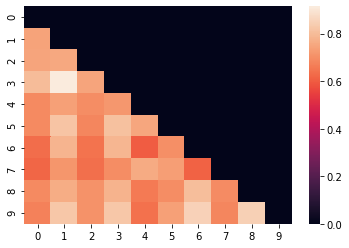

In [121]:
# import numpy as np; np.random.seed(0)
import seaborn as sns

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.express as px


ax = sns.heatmap(sim_matrix)
plt.plot()

In [122]:
# fig = px.imshow(sim_matrix)
text_slice_ori = sliced.apply(lambda x: x[:45] + '[...]').tolist()
text_slice = [f'[{i}]{elem}' for elem, i in zip(text_slice_ori, range(n))]
annot = []

fig = ff.create_annotated_heatmap(
    z = np.round(sim_matrix, 2),
    x = text_slice,
    y = text_slice,
    #annotation_text = [['a' for y in range(n)] for x in range(n)]
)

fig.show()

In [123]:
x = sim_matrix.copy()

# save matrix as rows of type [value, ind_0, ind_1]
XX,YY = np.meshgrid(np.arange(x.shape[1]),np.arange(x.shape[0]))
table = np.vstack((x.ravel(),XX.ravel(),YY.ravel())).T

tfiltered = table[table[:,0] > 0]
tsorted = tfiltered[tfiltered[:,0].argsort()][::-1]
tsorted

array([[0.91470459, 1.        , 3.        ],
       [0.85354019, 6.        , 9.        ],
       [0.84918818, 8.        , 9.        ],
       [0.82868042, 1.        , 9.        ],
       [0.82820558, 3.        , 9.        ],
       [0.81857439, 1.        , 5.        ],
       [0.81210596, 3.        , 5.        ],
       [0.80623685, 6.        , 8.        ],
       [0.80160259, 0.        , 3.        ],
       [0.78782441, 3.        , 6.        ],
       [0.78442554, 1.        , 6.        ],
       [0.78081258, 3.        , 8.        ],
       [0.76684056, 1.        , 8.        ],
       [0.76213289, 4.        , 7.        ],
       [0.75406924, 1.        , 2.        ],
       [0.75369573, 4.        , 5.        ],
       [0.75009561, 2.        , 3.        ],
       [0.74728341, 0.        , 2.        ],
       [0.74427213, 0.        , 1.        ],
       [0.73833819, 5.        , 9.        ],
       [0.737241  , 1.        , 4.        ],
       [0.73346755, 5.        , 7.        ],
       [0.

In [133]:
df = pd.DataFrame(tsorted, columns=['sim', 'ind_x', 'ind_y'])
df.ind_x = df.ind_x.astype(int)
df.ind_y = df.ind_y.astype(int)
df['text_x'] = df.apply(lambda x: sliced[x['ind_x']], axis=1)
df['text_y'] = df.apply(lambda x: sliced[x['ind_y']], axis=1)

df.head()

sim  ind_x  ind_y                                             text_x  \
0  0.914705      1      3  Traveling to have a business meeting takes the...   
1  0.853540      6      9  Please cc the following distribution list with...   
2  0.849188      8      9  1. login:  pallen pw: ke9davis I don't think t...   
3  0.828680      1      9  Traveling to have a business meeting takes the...   
4  0.828206      3      9  Randy, Can you send me a schedule of the salar...   

                                              text_y  
0  Randy, Can you send me a schedule of the salar...  
1  ---------------------- Forwarded by Phillip K ...  
2  ---------------------- Forwarded by Phillip K ...  
3  ---------------------- Forwarded by Phillip K ...  
4  ---------------------- Forwarded by Phillip K ...

In [136]:
print( df.text_x.iloc[0] )
print()
print( df.text_y.iloc[0] )


Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  My suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.

Randy, Can you send me a schedule of the salary and level of everyone in the scheduling group.  Plus your thoughts on any changes that need to be made.  (Patti S for example)Phillip


In [67]:
emails.head()

file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                         message_obj  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...   
1  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  Message-ID: <24216240.1075855687451.JavaMail.e...   
3  Message-ID: <13505866.1075863688222.JavaMail.e...   
4  Message-ID: <30922949.1075863688243.JavaMail.e...   

                                             payload  payload_len  
0                              Here is our forecast            21  
1  Traveling to have a business meeting takes the...          781  
2                     test successful.  way to go!!!           30  
3  Randy, Can you send me a schedule of the salar...          181  
4                Let's shoot for Tuesday at 11:45.             35

In [68]:
emails.tail()

file  \
995  allen-p/all_documents/458.   
996  allen-p/all_documents/459.   
997   allen-p/all_documents/46.   
998  allen-p/all_documents/460.   
999  allen-p/all_documents/461.   

                                           message_obj  \
995  Message-ID: <20430828.1075855696096.JavaMail.e...   
996  Message-ID: <18425275.1075855696118.JavaMail.e...   
997  Message-ID: <24036204.1075855666506.JavaMail.e...   
998  Message-ID: <33307764.1075855696139.JavaMail.e...   
999  Message-ID: <15009418.1075855696162.JavaMail.e...   

                                               payload  payload_len  
995  Jacques,Still trying to close the loop on the ...          579  
996  Larrry,I realize you are disappointed about th...          520  
997  ---------------------- Forwarded by Phillip K ...          740  
998  Jacques,I think we reached an agreement with G...          918  
999  ---------------------- Forwarded by Phillip K ...          443

# Next Steps

+ Topic modelling - [radimrehurek.com/gensim/models/word2vec.html](https://radimrehurek.com/gensim/models/word2vec.html)
+ Tensorflow [github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/word2vec/word2vec_basic.py](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/word2vec/word2vec_basic.py)